In [1]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt

# Loading Datasets

In [2]:
data_movie = pd.read_csv("movie.csv") #Datset eccontaining movie names
data_rating = pd.read_csv("rating.csv") #Dataset with rating of the movies given by each user

# Data Modelling

In [3]:
data_movie.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data_movie.shape

(27278, 3)

In [5]:
#n collaborative filtering we dont ned the content of the item.
data_movie.drop(['genres'],axis=1,inplace=True)

In [ ]:
data_rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [6]:
#droping timesttamp column
data_rating = data_rating.loc[:,["userId","movieId","rating"]]
data_rating.head()

,userId,movieId,rating
0,1,2.0,3.5
1,1,29.0,3.5
2,1,32.0,3.5
3,1,47.0,3.5
4,1,50.0,3.5


We will merge the movie and rating dataset


In [7]:
df = pd.merge(data_movie,data_rating)
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [8]:
df.describe()

,movieId,userId,rating
count,5.760114e+06,5.760114e+06,5.760114e+06
mean,9.033152e+03,1.965261e+04,3.523393e+00
std,1.970912e+04,1.143487e+04,1.052085e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,9.040000e+02,9.741000e+03,3.000000e+00
50%,2.174000e+03,1.953800e+04,3.500000e+00
75%,4.802000e+03,2.943400e+04,4.000000e+00
max,1.312580e+05,3.961700e+04,5.000000e+00


# Analysing the data

The movies which have been rated by most number of users:

In [9]:
df.groupby("title").count()["rating"].sort_values(ascending=False).head(20)

title
Pulp Fiction (1994)                                      19214
Forrest Gump (1994)                                      18962
Shawshank Redemption, The (1994)                         18158
Silence of the Lambs, The (1991)                         18038
Jurassic Park (1993)                                     17182
Star Wars: Episode IV - A New Hope (1977)                15661
Braveheart (1995)                                        15382
Terminator 2: Judgment Day (1991)                        15038
Matrix, The (1999)                                       14766
Schindler's List (1993)                                  14475
Toy Story (1995)                                         14184
Fugitive, The (1993)                                     14172
Apollo 13 (1995)                                         13635
Usual Suspects, The (1995)                               13539
Independence Day (a.k.a. ID4) (1996)                     13536
Star Wars: Episode VI - Return of the Jedi (1983)

In [10]:
df.groupby("title").count()["rating"].sort_values(ascending=False).tail(20)

title
If It's Tuesday, This Must Be Belgium (1969)                                              1
Ike: Countdown to D-Day (2004)                                                            1
Illegal (1955)                                                                            1
Illegal (2011)                                                                            1
Illustrated Man, The (1969)                                                               1
Illustrious Corpses (Cadaveri eccellenti) (1976)                                          1
Ilo Ilo (2013)                                                                            1
Imagine (2012)                                                                            1
Immensee (1943)                                                                           1
In Your Hands (2011)                                                                      1
Immortal Story, The (Histoire immortelle) (1968)                          

There are some movies with very few user ratings.
Similarly there are users who gave rating to very few movies.
This may cause inaccuracy in the code.
So deleting the movies with less than 200 reviews and deleting users who gave less 100 reviews would increase the accuracy of the model.

In [11]:
counts1 = df['userId'].value_counts()
df = df[df['userId'].isin(counts1[counts1 >= 100].index)]

counts2 = df['movieId'].value_counts()
df =df[df['movieId'].isin(counts2[counts2 >= 200].index)]

Checking the most common rating given by users:

<function matplotlib.pyplot.show>

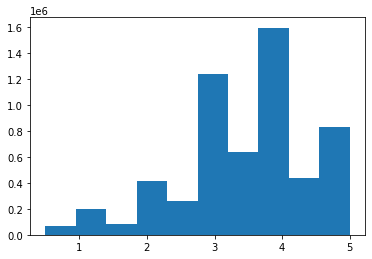

In [12]:
plt.hist(data_rating['rating'])
plt.show

Observation: 3-4 is the most common rating of the movies

Checking mean rating of the movies

(array([ 10.,  45.,  84., 197., 379., 556., 739., 945., 613.,  76.]),
 array([1.42600897, 1.72576531, 2.02552165, 2.32527799, 2.62503433,
        2.92479067, 3.22454701, 3.52430335, 3.82405969, 4.12381603,
        4.42357237]),
 <a list of 10 Patch objects>)

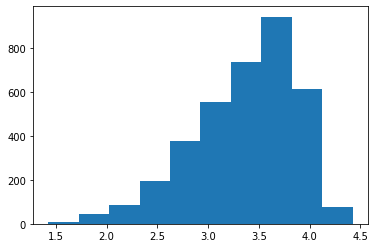

In [13]:
plt.hist(df.groupby("title").mean()['rating'].sort_values(ascending=False))

As we can see that the ratings and mean ratings are fairly distrubuted, which makes it great for recommendations.

# Recommending Movies With KNN

In [14]:
# Libraries for Recommendation System
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

Building a user vs item matrix

In [15]:
user_movie_table = df.pivot_table(index = ["title"],columns = ["userId"],values = "rating").fillna(0)
user_movie_table.head(10)

userId,1,3,7,11,14,18,21,22,23,24,25,29,31,35,46,51,53,54,56,58,61,69,70,73,77,82,88,89,90,91,96,101,103,104,109,112,116,124,129,130,...,39493,39494,39495,39497,39498,39499,39506,39507,39510,39514,39518,39525,39527,39528,39536,39538,39542,39544,39548,39549,39551,39553,39556,39559,39562,39569,39570,39575,39576,39579,39581,39582,39583,39593,39600,39601,39603,39604,39609,39613
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
*batteries not included (1987),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,3.5,0.0,0.0,4.5,3.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
"10,000 BC (2008)",0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,4.5,3.5
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,3.5,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,4.5
102 Dalmatians (2000),0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Lets check our engine

In [18]:
import numpy as np
query_index = np.random.choice(user_movie_table.shape[0])
print(user_movie_table.index[query_index])

Ip Man (2008)


In [19]:
user_movie_table_matrix = csr_matrix(user_movie_table.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_movie_table_matrix)
distances, indices = model_knn.kneighbors(user_movie_table.iloc[query_index,:].values.reshape(1, -1), n_neighbors =11)

In [20]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_movie_table.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_movie_table.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Ip Man (2008):

1: Kick-Ass (2010), with distance of 0.7003213947555289:
2: Thor (2011), with distance of 0.7099936176984982:
3: Watchmen (2009), with distance of 0.711873407655631:
4: Inception (2010), with distance of 0.7234617770238496:
5: Taken (2008), with distance of 0.7253436752419389:
6: Avatar (2009), with distance of 0.7283504801624596:
7: X-Men: First Class (2011), with distance of 0.7295601134116405:
8: Avengers, The (2012), with distance of 0.7297485878826125:
9: Iron Man 2 (2010), with distance of 0.7313072105310257:
10: Sherlock Holmes (2009), with distance of 0.7324786130228036:


# Conclusion:

1. The rocommender system is suggesting movies mainly from the same time period.
2. We can clearly see that the engine is not reccommending movies based on the content as "Ip Man" is a film based on martial art, and there are no martial art movies in suggestion list.
3. But all the movies are action/thriller so there are high chances that th user who saw Ip Man would like those movies.
